### Teilaufgabe 1
Recherchieren und erklären Sie die Begriffe "True Positive Rate" (TPR) und "False Positive Rate" (FPR).

Können Sie einen Zusammenhang herstellen zwischen diesem Begriffspaar und dem Begriffspaar Sensitivität/Spezifität?

>TPR Rate measures the proportion of positive instances that are accurately detected as positive by the model.  
>It is calculated as:
>
>TPR = TP / (TP + FN)

=> Sensitivität/Recall

> FPR measures the proportion of negative instances that are incorrectly classified as positive by the model.  
>FPR is calculated as:
>
>FPR = FP / (FP + TN)

### Teilaufgabe 2
Arbeiten Sie das [ Tutorial ROC & AUC ](https://mlu-explain.github.io/roc-auc/) durch und erläutern Sie, wie Sie die Achsenbeschriftung im ROC-Graphen durch Begriffe ersetzen können, die Sie aus der Vorlesung kennen.

=> TPR Rate kann durch den Begriff "Recall" ersetzt werden.

### Teilaufgabe 3
Betrachten Sie den Train/Validation/Test-Split im Heart-Datensatz aus Aufgabe 5 sowie den dort trainierten DecisionTreeClassifier mit bestmöglichen Hyperparametern.

Zeichnen Sie die ROC-Kurve und berechnen Sie den AUC-Wert.

Hinweis: Sie können ROC-Kurve und AUC selber berechnen oder hierzu eine geeignete sklearn-Funktionalität verwenden.

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# import dataset
df_heart = pd.read_csv("./datasets/heart.csv")

# split into features and target
X = df_heart.iloc[:, :-1].copy()
y = df_heart.iloc[:, -1].copy()
y = df_heart.iloc[:,-1].copy().astype("int")

# get categorical and numerical columns
X_numcols = X.select_dtypes(include=np.number).columns.tolist()
X_catcols = X.select_dtypes(exclude=np.number).columns.tolist()


# split into train, validation and test sets
X_train, X_rest, y_train, y_rest = train_test_split(X,y, train_size=1/3, random_state=42, stratify=y)
X_validation, X_test, y_validation, y_test = train_test_split(X_rest, y_rest, train_size=0.5, random_state=42, stratify=y_rest)

X_train.reset_index(drop=True, inplace=True)
X_validation.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)


enc = OneHotEncoder( handle_unknown="ignore", sparse_output=False, drop="if_binary" )


# fit the encoder on the training set
X_train_cat = pd.DataFrame (
	enc.fit_transform ( X_train.loc[:,X_catcols] ),
	columns=enc.get_feature_names_out(),
	index=X_train.index
)

X_train = pd.concat([X_train.loc[:,X_numcols], X_train_cat], axis=1)

# transform the validation and test sets using the fitted encoder
X_test_cat = pd.DataFrame (
	enc.transform ( X_test.loc[:,X_catcols] ),
	columns=enc.get_feature_names_out(),
	index=X_test.index
)

X_test = pd.concat([X_test.loc[:,X_numcols], X_test_cat], axis=1)

X_validation_cat = pd.DataFrame (
	enc.transform ( X_validation.loc[:,X_catcols] ),
	columns=enc.get_feature_names_out(),
	index=X_validation.index
)

X_validation = pd.concat([X_validation.loc[:,X_numcols], X_validation_cat], axis=1)

In [40]:
from sklearn import tree
from sklearn.metrics import accuracy_score



clf = tree.DecisionTreeClassifier ( max_depth=6, min_samples_leaf=8, random_state=42 )
clf.fit ( X_train, y_train )

probs_test   = clf.predict_proba(X_test)
probs_test

array([[0.        , 1.        ],
       [0.7       , 0.3       ],
       [0.1       , 0.9       ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.57142857, 0.42857143],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.4       , 0.6       ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.57142857, 0.42857143],
       [1.        , 0.        ],
       [0.625     , 0.375     ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.1       , 0.9       ],
       [1.        , 0.        ],
       [0.

In [41]:
probs_test_positive   = clf.predict_proba(X_test)[:,1]
probs_test_positive

array([1.        , 0.3       , 0.9       , 1.        , 0.        ,
       0.        , 0.42857143, 0.        , 0.        , 0.        ,
       0.6       , 1.        , 0.        , 0.        , 0.42857143,
       0.        , 0.375     , 0.        , 0.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 0.9       , 0.        ,
       1.        , 1.        , 0.42857143, 0.        , 1.        ,
       0.75      , 0.75      , 0.        , 1.        , 0.        ,
       0.9       , 0.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.7       , 1.        , 0.9       , 0.08333333, 0.42857143,
       0.75      , 1.        , 0.        , 0.42857143, 1.        ,
       0.        , 0.75      , 0.        , 0.        , 0.6       ,
       0.        , 0.375     , 0.        , 0.08333333, 1.        ,
       1.        , 0.        , 1.        , 1.        , 0.375  

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score


fpr, tpr, thresholds = roc_curve(y_validation, probs_test_positive)
auc = roc_auc_score(y_validation, probs_test_positive)
auc

np.float64(0.435856401384083)

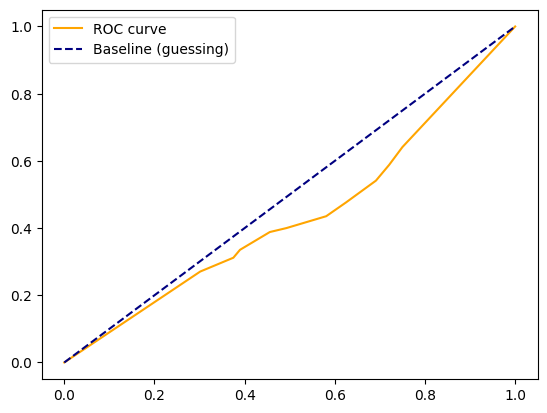

In [43]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color="orange", label="ROC curve")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--", label="Baseline (guessing)")
plt.legend()
plt.show()